# Classification template

## Importing the libraries

In [6]:
!pip install -r requirements.txt

In [1]:
# IMPORTA AS BIBLIOTECAS
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
# LE O .CSV
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


## Data Pre-Processing
### Importing the dataset

In [172]:
# CRIA UM VETOR COM TODAS AS LINHAS (:) E COM AS COLUNAS 2 E 3 ([2, 3])
X = dataset.iloc[:, [2, 3]].values
# CRIA UM VETOR COM TODAS AS LINHAS (:) E COM A COLUNA 4 ([4])
y = dataset.iloc[:, 4].values

### Splitting the dataset into the Training set and Test set

In [173]:
# SEPARA OS VALORES
# X_TRAIN: PARTE DE X QUE SERÁ USADA PARA O TREINAMENTO
# X_TEST: PARTE DE X QUE SERÁ USADA PARA TESTAR O MODELO
# Y_TRAIN: PARTE DE Y QUE SERÁ USADA PARA O TREINAMENTO
# Y_TEST: PARTE DE Y QUE SERÁ USADA PARA TESTAR O MODELO
# test_size: 
# random_state: 0: não randomiza os valores de X
#               1: randomiza os valores de X
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [137]:
len(X_train)

300

In [138]:
len(X_test)

100

### Feature Scaling

In [174]:
# PROCESSA OS VALORES PARA QUE SE ENCAIXEM EM UMA CERTA ESCALA
# TRAINING: fit_transform (realiza a escala, media, variancia)
# TEST: transform (realiza a escala e usa os valores de media encontrados para TRAINING)

#from sklearn.preprocessing import QuantileTransformer
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# https://medium.com/analytics-vidhya/feature-transformation-and-scaling-techniques-to-boost-your-model-performance-97af70fb48b2

#sc = StandardScaler()
#qt = QuantileTransformer()
mms = MinMaxScaler()

# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# X_train = qt.fit_transform(X_train)
# X_test = qt.transform(X_test)

X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

## Fitting classifier to the Training set

In [175]:
# REALIZA O TREINAMENTO UTILIZANDO A REGRESSÃO LOGISTICA 

#from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import PassiveAggressiveClassifier


classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)


LogisticRegression(random_state=0)

In [176]:
# UTILIZANDO O MODELO PREDIZEMOS USANDO O X_TEST
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix


In [177]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [178]:
print(cm)

[[58  0]
 [ 6 16]]


# Visualising

## Training set results


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


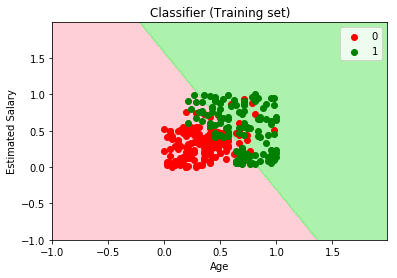

In [179]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


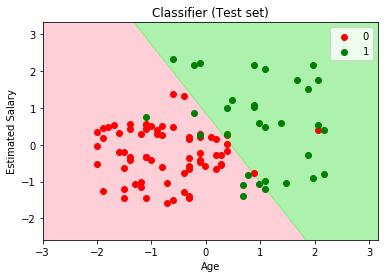

In [24]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [180]:
#RESULTADOS 
#Usando MinMax

data = {"T.S. 15% (340 Training, 60 Test)": ["41 4", "5 10"], "T.S. 20% (320 Training, 80 Test)": ["53 5", "3 19"], "T.S. 25% (300 Training, 100 Test)": ["62 6", "4 28"], "T.S. 30% (280 Training, 120 Test)": ["70 9", "6 35"]}

df = pd.DataFrame(data, columns=["T.S. 15% (340 Training, 60 Test)", "T.S. 20% (320 Training, 80 Test)", "T.S. 25% (300 Training, 100 Test)", "T.S. 30% (280 Training, 120 Test)"])

print("Decision Tree")
print(df)

Decision Tree
  T.S. 15% (340 Training, 60 Test) T.S. 20% (320 Training, 80 Test)  \
0                             41 4                             53 5   
1                             5 10                             3 19   

  T.S. 25% (300 Training, 100 Test) T.S. 30% (280 Training, 120 Test)  
0                              62 6                              70 9  
1                              4 28                              6 35  


In [181]:
data = {"T.S. 18% (328 Training, 72 Test)": ["53 0", "5 14"], "T.S. 20% (320 Training, 80 Test)": ["58 0", "6 16"], "T.S. 25% (300 Training, 100 Test)": ["67 1", "10 22"], "T.S. 30% (280 Training, 120 Test)": ["76 3", "16 25"]}

df = pd.DataFrame(data, columns=["T.S. 18% (328 Training, 72 Test)", "T.S. 20% (320 Training, 80 Test)", "T.S. 25% (300 Training, 100 Test)", "T.S. 30% (280 Training, 120 Test)"])

print("Logistic")
print(df)

Logistic
  T.S. 18% (328 Training, 72 Test) T.S. 20% (320 Training, 80 Test)  \
0                             53 0                             58 0   
1                             5 14                             6 16   

  T.S. 25% (300 Training, 100 Test) T.S. 30% (280 Training, 120 Test)  
0                              67 1                              76 3  
1                             10 22                             16 25  


# Awesome!

### Credits
based on superdatascience.com Machine Learning A-Z, by Kirill Eremenko and Hadelin de Ponteves. Thanks For sharing the knowleged!